<a href="https://www.kaggle.com/code/vencerlanz09/elon-musk-tweets-eda-and-sentiment-analysis?scriptVersionId=125398420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-family:verdana;"> <center>🤵‍♂️  Tweets EDA and Sentiment Analysis</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">Thanks for visiting my notebook </center></p>

***

<center><img src='https://media2.giphy.com/media/v6LmZUEsXHacGsD4UT/giphy.gif?cid=ecf05e47r1kim8nb14w26tojy5m92yohv2imfouetc9gq8v9&rid=giphy.gif&ct=s' height=200px width=300px></center>

# 👋Thanks for Visting my Notebook
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    📌 Feel free to fork or edit the notebook for your own convenience. If you liked the notebook, consider upvoting. It helps other people discover the notebook as well. Your support inspires me to produce more of these kernel.😊
</div>

# 🔬Overview 

<div style="background-color:#d4f1f4; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Elon Musk is one of the most prominent figures in the tech industry, with a massive following on Twitter. His tweets often make headlines and can have significant effects on the stock market and public opinion. Therefore, it is essential to conduct exploratory data analysis (EDA) and sentiment analysis on his tweets..</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em"> EDA involves examining and analyzing data to uncover patterns, trends, and relationships. For Elon Musk's tweets, EDA can help identify his most frequent topics, popular keywords, and the time of day he is most active. This information can provide insights into his interests, concerns, and communication style. Furthermore, analyzing his tweet frequency and patterns can help identify periods of high activity and predict when he may make significant announcements or statements.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Sentiment analysis is another crucial analysis for Elon Musk's tweets. Sentiment analysis involves using natural language processing and machine learning to determine the sentiment of text data. In this case, sentiment analysis can determine whether his tweets have positive, negative, or neutral sentiment. This analysis can provide insights into how people are reacting to his tweets and whether his tweets are impacting public opinion. Additionally, sentiment analysis can help identify the potential impact of his tweets on the stock market, particularly in the electric vehicle and space industries.</p>
</div>

# ❗Author's Note:
<div style="background-color:#d4f1f4; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Make sure to run the cells from top to bottom with a GPU accelerator. There are some linux commands present in some cells so this is important to take into account. Also, any suggestions, comments and recommendations to improve the notebook will be highly appreciated. Cheers!</p>
</div>

<a id="section-two"></a>
# 🛠️Installing Necessary Libraries

In [1]:
# Libraries
!pip install pyspellchecker
!pip install scattertext
!pip install nltk
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.0 MB/s eta 0:00:00


# 🧰Importing Necessary Libraries

In [2]:
# Import Data Preprocessing and Wrangling libraries
import re
from tqdm.notebook import tqdm
import pandas as pd 
import numpy as np
from datetime import datetime
import dateutil.parser

# Import NLP Libraries
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
import scattertext as st
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 

# Downloading periphrals
nltk.download('vader_lexicon')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# ✒️Initialization
<div style="background-color:#f2f2f2; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">For this section we will use seaborn's darkgrid format as a default visualization style. We will also be utilizing <b>SentimentIntensityAnalyzer</b> to determine the user sentiments for every tweet. This Analyzer separates the sentiments into three classes: positive, neutral and negative. <b>The SpellChecker</b> library will be used to fix misspelled words and the visualization library <b>Plotly</b> will be utilized to view interactive graphs. 


In [3]:
import os
directory = '/kaggle/input/elon-musk-tweets'
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
df_list = []
for csv in csv_files:
    df = pd.read_csv(os.path.join(directory, csv))
    df_list.append(df)

In [4]:
# Intializate our tools 
sns.set_style('darkgrid')

# For sentiment analysis 
sia = SIA() 

# To identify misspelled words
spell = SpellChecker() 

# To display plotly graphs 
pyo.init_notebook_mode() 

# Storing csv dataset into a datframe
df = pd.concat(df_list)

# 🏗️Data Preprocessing
<div style="background-color:#f2f2f2; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">In this part we will be using the datetime module to fix the formatting of the date column. We will also be using regular expressions to fix the structure of the text and remove unnecessary ASCII symbols.
    
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The code below is performing several pre-processing steps on a dataset containing tweets. The first few lines create a copy of the original dataset and then create two new columns in the copied dataset called <b>original_tweet</b> and <b>datetime</b>. The <b>original_tweet</b> column contains the original tweet text, while the <b>datetime</b> column contains the date and time of the tweet as a datetime object.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The next line drops the <b>date</b> and <b>time</b> columns from the dataset, as they are no longer needed. Then, the <b>datetime</b> column is transformed using the <b>apply</b> method and the <b>lambda</b> function. This converts the <b>datetime</b> column from a string to a datetime object using the specified format string.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Next, a boolean mask is created using the <b>apply</b> method and the <b>lambda</b> function to identify retweets. This is done by checking if the string <b>RT @</b> is present in the tweet text.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The following lines perform several standard tweet pre-processing steps. This includes converting all the text to lowercase, removing Twitter handles (usernames starting with <b>@</b>), removing hashtags, removing URLs, removing special characters, and removing all single characters. Finally, multiple spaces are substituted with a single space.</p>    

</div>

In [5]:
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [6]:
data = df.copy()
data['original_tweet'] = df['text']
data['datetime'] = data['date']
data['datetime'] = data.datetime.apply(lambda x: dateutil.parser.parse(x))
rt_mask = data.text.apply(lambda x: "RT @" in x)

# standard tweet preprocessing 
data.text = data.text.str.lower()
#Remove twitter handlers
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))
#remove hashtags
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove URLS
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))
# Remove all the special characters
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))
#remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# convert the 'date' column to datetime format and remove the timezone information
data['datetime'] = pd.to_datetime(data['datetime']).dt.tz_localize(None)


# Viewing the preprocessed data
data.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  i find the gold toe sock inevitably off kilter...      NaN   
1                  sock con the conference for socks      NaN   
2  always something new for the magazine cover an...      NaN   
3                                   this guy gets it      NaN   
4  sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  \
0  Twitter for iPhone       335       6542       False   
1  Twitter for iPhone      1451      30753       False   
2  Twitter for iPhone      1284      28610       False   
3  Twitter for iPhone       131       3640       False   
4  Twitter for iPhone      1191      23790       False   

                                      original_tweet            datetime  
0  @BillyM2k I find the gold toe sock – inevitabl... 2022-07-05 17:55:09  
1                 Sock Con, the conference for socks 2022-07-05 17:47:42  
2  Always something new for the magazine cover an... 2022-07-05 17:46:15  
3                   @ExplainThisBob This guy gets it 2022-07-05 17:40:05  
4  Sock tech is so advanced that you can get pret... 2022-07-05 17:38:23

# 🛠️Feature Extraction
<div style="background-color:#f2f2f2; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">At this point, we are going to use the initialized libraries above to fix spelling mistakes and apply Sentiment analysis to the individual tweets. The datetime column will also be feature engineered into different types so that it could be used for further visualizations later on.</p>


In [7]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

# Feature Extraction
data['words'] = data.text.apply(lambda x:re.findall(r'\w+', x ))
data['errors'] = data.words.apply(spell.unknown)
data['errors_count'] = data.errors.apply(len)
data['words_count'] = data.words.apply(len)
data['sentence_length'] = data.text.apply(len)
data['hour'] = data.datetime.apply(lambda x: x.hour)
data['date'] = data.datetime.apply(lambda x: x.date())
data['month'] = data.datetime.apply(lambda x: x.month)
data['year'] = data.datetime.apply(lambda x: x.year)


# Extract Sentiment Values for each tweet 
data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['text'])]
data['overall_sentiment'] = data['sentiment'].apply(label_sentiment);

  0%|          | 0/4323 [00:00<?, ?it/s]

# 📈EDA and Data Visualization
<div style="background-color:#f2f2f2; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">In this part we will be performing simple Exploratory data analysis and visualize the data. We will be checking for missing values, do statistical analysis and view relationships between different data columns.</p>


In [8]:
# Get the count of non-null values for each column
column_counts = data.count()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=column_counts.index,
    y=column_counts.values
))

# Add axis labels and title
fig.update_layout(
    xaxis_title="Column",
    yaxis_title="Count",
    title="Number of Rows per Column",
    title_font=dict(size=20),
    font=dict(size=14),
    height=600,
    template='plotly_dark'
)

# Add a subtitle and subheader
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.5, y=1.15,
    text='<b>Data Column Count Distribution</b>',
    showarrow=False,
    font=dict(size=24)
)

fig.add_annotation(
    xref='paper', yref='paper',
    x=0.5, y=1.05,
    text='Number of non-null rows per column in the dataset',
    showarrow=False,
    font=dict(size=16)
)

# Show the chart
fig.show()


In [9]:
# Get the count of missing values for each column
column_na_count = data.isna().sum()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=column_na_count.index,
    y=column_na_count.values,
    marker_color='rgb(253, 128, 93)' # Set custom color for the bars
))

# Add axis labels and title
fig.update_layout(
    xaxis_title="Column",
    yaxis_title="Missing Value Count",
    title="Missing Values per Column",
    font=dict(
        size=14,
        color='white'
    ),
    plot_bgcolor='rgb(17, 17, 17)', # Set dark background color
    paper_bgcolor='rgb(17, 17, 17)', # Set dark background color for the entire plot
)

# Add subheader
fig.add_annotation(
    x=0.5,
    y=1.1,
    xref='paper',
    yref='paper',
    text="<b>Number of missing values per column</b>",
    showarrow=False,
    font=dict(
        size=16,
        color='white'
    )
)

# Show the chart
fig.show()


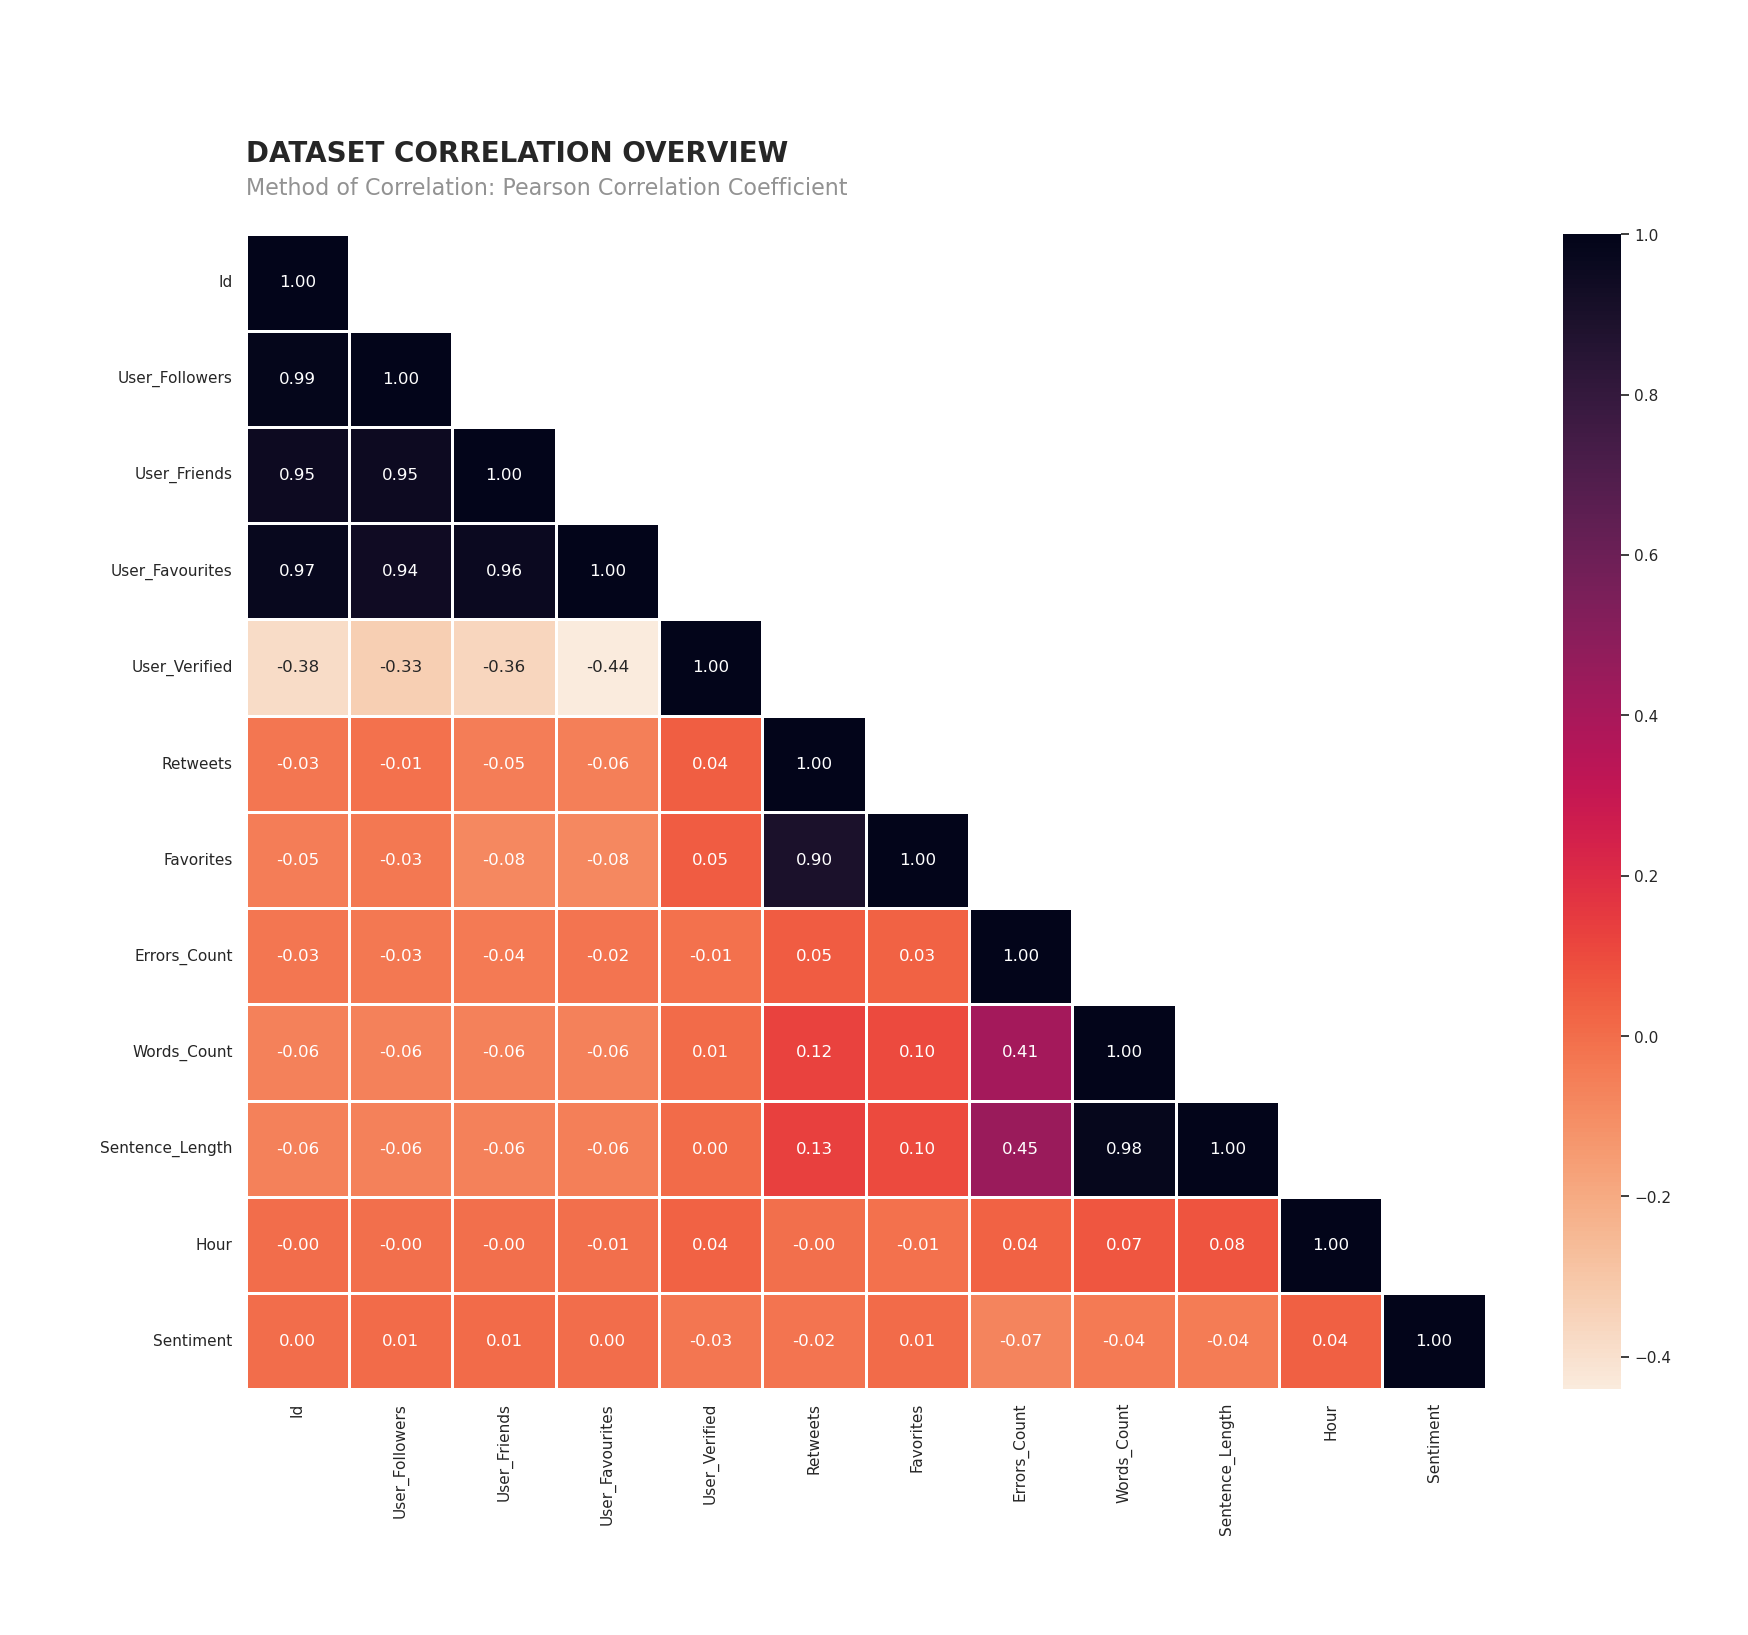

In [10]:
def plot_heatmap(data, cmap=sns.color_palette(palette='rocket_r', as_cmap=True), height=3, linewidth=1, title=' ', subtitle=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})

    mask = np.zeros_like(data, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)] = False

    g = sns.heatmap(data=data, cmap=cmap,
                    linewidths=linewidth,
                    annot=True,
                    fmt='.2f',
                    mask=mask,
                    cbar_kws=dict(location='right'))

    g.set_xlabel(' \n\n\n\n')
    g.set_ylabel(' \n\n\n\n')

    g.set_xticklabels([tick_label.get_text().title() for tick_label in g.get_xticklabels()])
    g.set_yticklabels([tick_label.get_text().title() for tick_label in g.get_yticklabels()])

    g.set_title(f'\n\n\n\n{title}\n\n'.upper(),
                loc='left',
                fontdict=dict(
                    fontsize=20,
                    fontweight='bold'))

    plt.text(s=f'{subtitle}',
             alpha=0.5,
             x=0,
             y=-0.6,
             horizontalalignment='left',
             verticalalignment='top',
             fontsize=16)

    plt.text(s=' ',
             x=1.2,
             y=1,
             transform=g.transAxes)
    plt.savefig('corr.png')
    return g

plot_heatmap(
    height=15,
    # Remove columns 'year' and 'month' because it has only one value count
    data=data.drop(['year', 'month', 'source', 'is_retweet'], axis=1).corr(),
    title='Dataset Correlation Overview',
    subtitle='Method of Correlation: Pearson Correlation Coefficient'
);


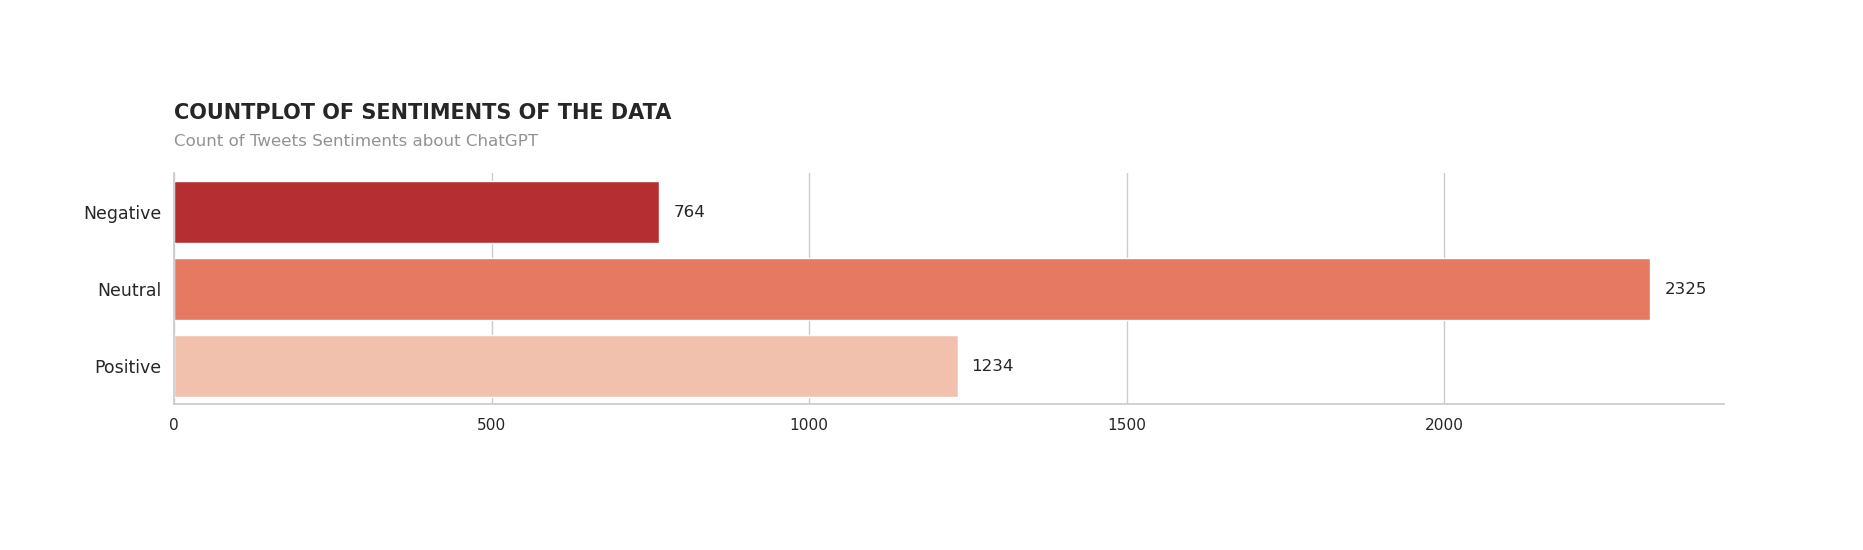

In [11]:
def plot_countplot(data=None, x=None, y=None, palette='Reds_r', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid',
            rc = {'figure.figsize': (20,height)})

    g = sns.countplot(data=data, y=y, x=x, palette=palette)

    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')

    g.set_title(
        f'\n\n\n\n{title}\n\n'.upper(),
        loc = 'left',
        fontdict = dict(
            fontsize = 15,
            fontweight = 'bold'))

    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))

    plt.text(s = f'{subtitle}',
             alpha = 0.5,
             x = 0,
             y = 1.12,
             horizontalalignment = 'left',
             transform = g.transAxes)

    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)

    g.bar_label(container = g.containers[0], padding = 10,)

    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)

    sns.despine()
    plt.savefig('countplot.png')
    return g

plot_countplot(y = data['overall_sentiment'],
               title = 'Countplot of Sentiments of the data',
               subtitle='Count of Tweets Sentiments about ChatGPT',
               height = 3);

In [12]:
# create a line plot with Plotly Express
fig = px.line(data, x='datetime', y='retweets', title='Retweets Over Time', template='plotly_dark')

# display the plot
fig.show()

In [13]:
# create a line plot with Plotly Express
fig = px.line(data, x='datetime', y='favorites', title='Favorites Over Time', template='plotly_dark')

# display the plot
fig.show()

In [14]:
# create trace for the line chart
trace = go.Scatter(x=data['datetime'], y=data['user_friends'], mode='lines', 
                   name='User Friends', line=dict(color='#3C91E6'))

# set layout options
layout = go.Layout(title='Change in User Friends over Time', template='plotly_dark', xaxis=dict(title='Date'), yaxis=dict(title='Friends'))

# create the figure and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [15]:
# Create trace
trace = go.Scatter(x=data['datetime'], y=data['user_followers'], mode='lines', marker=dict(color='#00FF00'))

# Create layout
layout = go.Layout(title='Twitter Followers Over Time', xaxis=dict(title='Date'), yaxis=dict(title='Followers'), template='plotly_dark')

# Create figure
fig = go.Figure(data=trace, layout=layout)

# Show figure
fig.show()

<a id="sub-one"></a>
# 📏Sentence Length and Wordcount Weigthed Average

In [16]:
# Helper Function to get the running average 
def get_weighted(series: pd.Series, beta=0.9):
    weighted = pd.Series(dtype=float)
    weighted[series.index[0]] = 0 
    for i in range(1, len(series)):
        current = series.iloc[i]
        previous = weighted.iloc[i-1]
        date = series.index[i]
        weighted[date] = beta*previous + (1-beta)*current
    return weighted 

# Get a two-line title for our plots
def get_multi_line_title(title:str, subtitle:str):
    return f"{title}<br><sub>{subtitle}</sub><br>"

In [17]:
def get_multi_line_title(title, subtitle):
    return f"{title}<br><sub>{subtitle}</sub>"

title = get_multi_line_title(
    "Sentence Length of Tweets", 
    "Plotting the average number of Sentence Lengths for ceratin hour period of the day"
)

beta = 0.99 #higher value -> smoother curve

length = data.groupby('datetime')['sentence_length'].mean()
length_std = length.std()
length = length[length < 3*length_std]

weighted_length = get_weighted(length, beta)

fig = go.Figure([
    go.Scatter(
        name="Hourly Average Sentence Length",
        x=length.index, 
        y=length.values,
        mode="markers",
        opacity=0.3,
        marker_color="salmon"
    ), 
    go.Scatter(
        name="Weighted Average Sentence Length",
        x=weighted_length.index, 
        y=weighted_length.values,
        opacity=0.8,
        marker_color='crimson'
    ),
])

fig.update_layout(
    hovermode='x',
    title=title,
    xaxis_title="Time",
    yaxis_title="Average Sentence Length per tweet",
    template="plotly_dark",
    legend_orientation = 'h'
)

fig.show()
fig.write_image('sentence_length.png')


In [18]:
title = get_multi_line_title(
    "Word Count of Tweets", 
    "Plotting the average number of Word Count for ceratin hour period of the day"
)

beta = 0.99 #higher value -> smoother curve

length = data.groupby('datetime')['words_count'].mean()
length_std = length.std()
length = length[length < 3*length_std]

weighted_length = get_weighted(length, beta)

fig = go.Figure([
    go.Scatter(
        name="Hourly Average Word Count",
        x=length.index, 
        y=length.values,
        mode="markers",
        opacity=0.3,
        marker_color="lightseagreen"
    ), 
    go.Scatter(
        name="Weighted Average Word Count",
        x=weighted_length.index, 
        y=weighted_length.values,
        opacity=0.8,
        marker_color='aquamarine'
    ),
])

fig.update_layout(
    hovermode='x',
    title=title,
    xaxis_title="Time",
    yaxis_title="Average Word Count per tweet",
    template="plotly_dark",
    legend_orientation = 'h'
)

fig.show()

<a id="sub-two"></a>
# 📜Sentence Length Distribution

In [19]:
df_copy = data.copy()

title = get_multi_line_title("Sentence Length Distribution", "Distribution of number of characters per tweet, by source")

data = df_copy[df_copy['text'].apply(len) != 0]
top_devices = data.groupby('source')['text'].count().sort_values(ascending=False)[:5].index.tolist()
data = data[data['source'].apply(lambda x: x in top_devices)]

fig = px.histogram(data, x="sentence_length", color="source", opacity=0.75)

fig.update_layout(
    title=title,
    xaxis_title="Number of Characters per Tweet",
    yaxis_title="Count",
    template="plotly_dark",
    legend_title_text="Language",
    font=dict(
        family="Arial",
        size=16,
        color="white"
    ),
    hoverlabel=dict(
        font=dict(
            family="Arial",
            size=16,
            color="white"
        )
    )
)

fig.show()
fig.write_image('sentence_length_dist_by_lang.png')


<a id="sub-three"></a>
# 📊Number of Activity per hour period of the day

In [20]:
title = get_multi_line_title(
    "Activity all over the day", 
    "Chat GPT tweets across the day")

annual_counts = pd.DataFrame(df_copy['hour'].value_counts()).reset_index()
annual_counts.columns = ['hour', 'count']
annual_counts = annual_counts[annual_counts['hour'] != 2021].sort_values('hour')

fig = go.Figure(go.Bar(
    name="Annual Count", 
    x=annual_counts.hour, 
    y=annual_counts['count'], 
    marker_color=annual_counts['count'] 
))
# plt.xticks(range(1,25))
fig.update_layout(
    template='plotly_dark', 
    title=title, 
    xaxis = dict(
        tickvals=np.arange(0,24), 
        ticktext=[f"{h:02d}:00" for h in range(24)]
    )
)
fig.show()
fig.write_image('Number of Activity per hour period of the day.png')


<a id="sub-four"></a>
# 🕘Time of the day most Tweeted

In [21]:
title = get_multi_line_title("Time of the day most Tweeted", "")

def format_hour(h: int):
    h = str(h)
    if len(h) == 1: 
        h = '0'+h
    h = h+ ":00"
    return h

oc = df_copy
hourly = oc.groupby('hour')['text'].count()
hourly = pd.DataFrame(hourly).reset_index()
hourly.columns =['Hour of Day',"Number of Tweets"]
hourly['Hour of Day'] = hourly['Hour of Day'].apply(format_hour)

fig = px.line_polar(
    data_frame=hourly,
    r = 'Number of Tweets',
    theta='Hour of Day',
    line_close=True,
    color_discrete_sequence=['crimson'],
)

fig.update_layout(
    title=title, 
    template="plotly_dark",
    title_x=0.5,
    height=900,
#     width=900
)

fig.write_image('Time of day most tweeted.png')
fig.show()


<a id="sub-five"></a>
# 😐Sentiment Distributions

In [22]:
title = get_multi_line_title(
    'Sentiment Distribution',
    "What are the sentiments of Twitter Users about ChatGPT?"
)

sentiment_pie = pd.DataFrame(df_copy['overall_sentiment'].value_counts() / df_copy.shape[0]*100).reset_index()
sentiment_pie.columns = ['Sentiment', 'Percentage']
fig = px.pie(sentiment_pie, values='Percentage', names='Sentiment', title=title)

fig.update_traces(marker=dict(colors=['#00adb5', '#f8b195', '#f67280']), textposition='inside')
fig.update_layout(
    title=title,
    title_x=0.48,
    template='plotly_dark',
    font=dict(
        family='Arial',
        size=20,  # Increase label font size to 20
        color='white'
    ),
    height=700,
    legend=dict(
        title='',
        orientation='h',
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5,
        font=dict(
            family='Arial',
            size=12,
            color='white'
        )
    )
)
fig.write_image('Sentiment Distribution.png')
fig.show()


In [23]:
sentiment_over_time = df_copy.sort_values('hour')[['hour', 'sentiment', 'overall_sentiment']]
annual_sentiment = pd.DataFrame(sentiment_over_time.groupby('hour')['overall_sentiment'].value_counts())
annual_sentiment.columns = ['Count']
annual_sentiment = annual_sentiment.reset_index()

title = get_multi_line_title('Hourly Tweet Sentiment', "Tweet Sentiments all over the day")
years = annual_sentiment.hour.unique().tolist()
sents = {'positive' : 'mediumseagreen', 'negative': 'crimson', 'neutral': 'royalblue'}

sentiment_bars = [] 
for s in sents.keys():
    current_year = annual_sentiment[annual_sentiment.overall_sentiment == s]
    sentiment_bars.append(
        go.Bar(name=s, x=current_year.hour, y=current_year.Count, marker_color=sents[s])
    )

fig = go.Figure(sentiment_bars)
fig.update_layout(
    template='plotly_dark',
    title=title,
    xaxis=dict(
        title='Time of Day',
        tickmode='array',
        tickvals=[0, 4, 8, 12, 16, 20, 24],
        ticktext=['12AM', '4AM', '8AM', '12PM', '4PM', '8PM', '12AM'],
        tickangle=0,
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='white',
        mirror=True,
        gridcolor='white',
        zeroline=False,
    ),
    yaxis=dict(
        title='Count',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='white',
        mirror=True,
        gridcolor='white',
    ),
    legend=dict(
        title='',
        orientation='h',
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5,
        font=dict(
            family='Arial',
            size=12,
            color='white'
        )
    )
)
fig.write_image('Hourly tweet sentiment.png')
fig.show()


<a id="sub-six"></a>
# 🌩️Wordcloud of Sentiments

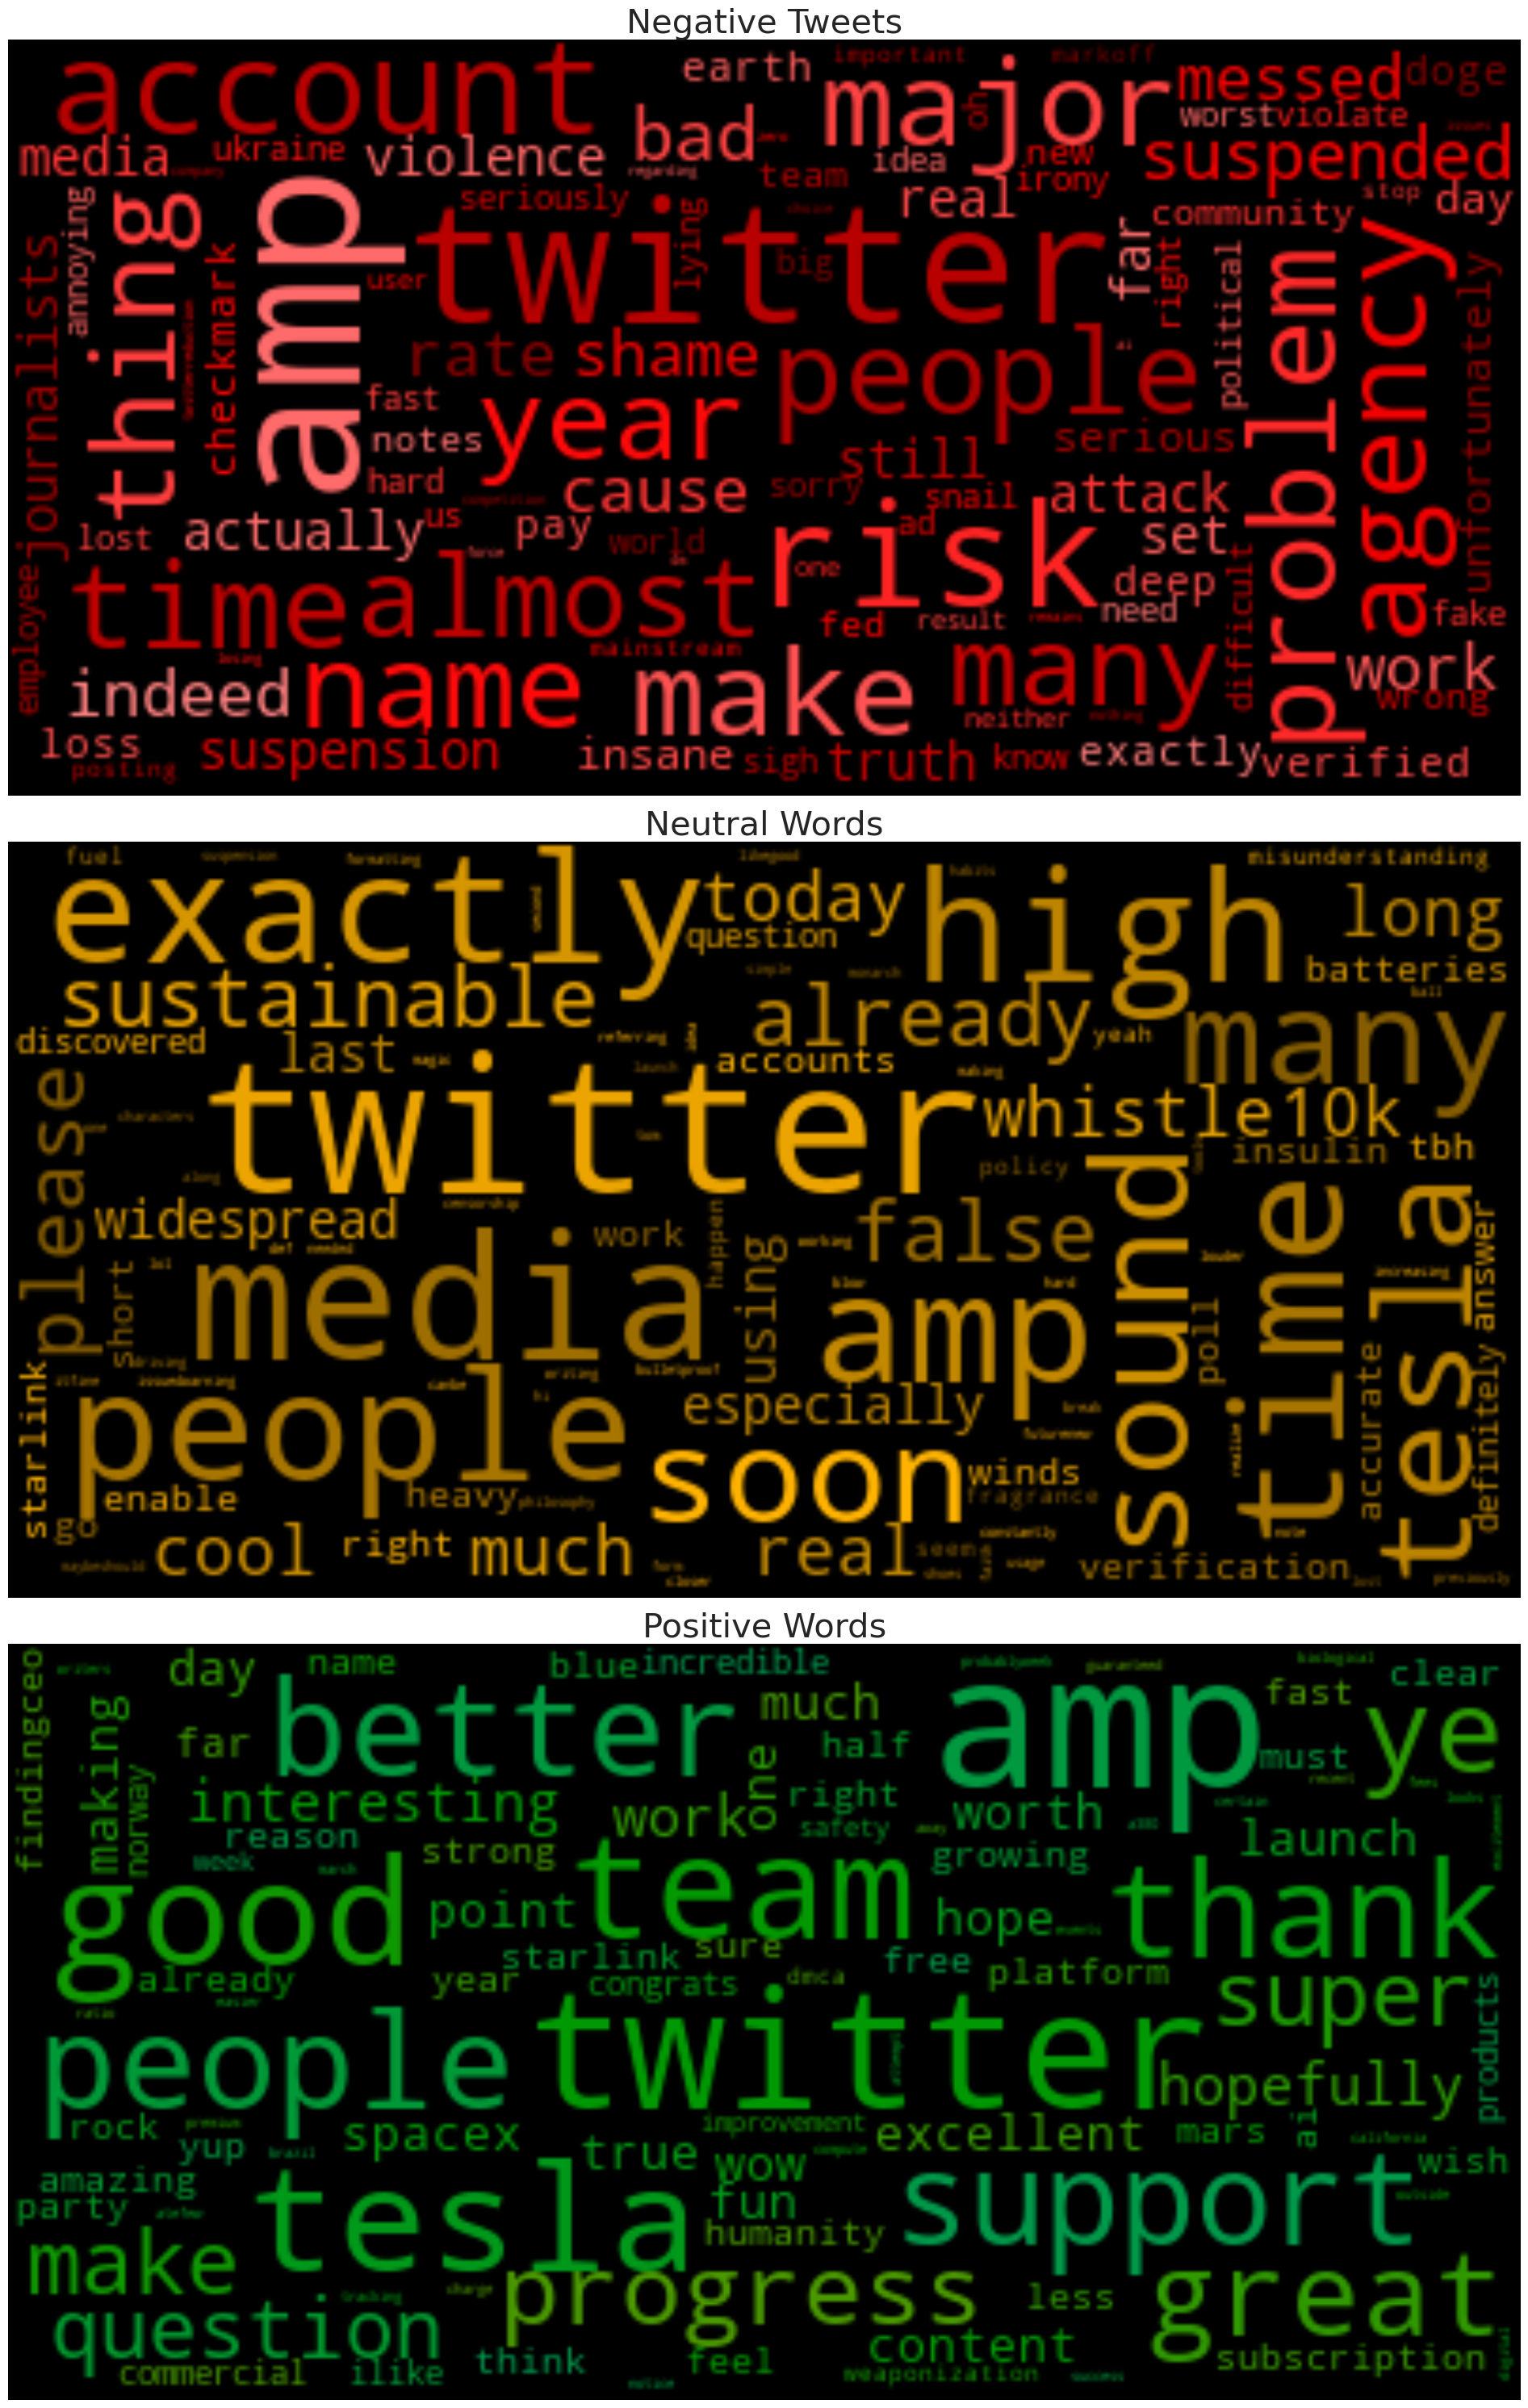

In [24]:
def flatten_list(l):
    return [x for y in l for x in y]

# color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(3, 1, figsize=(20,30))
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Tweets", fontsize=30)
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words", fontsize=30)
    axes[1].axis("off")
    
    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words", fontsize=30)
    axes[2].axis("off")

    plt.tight_layout()
    plt.subplots_adjust(wspace=1.5)
#     plt.style.use('dark_background')
    plt.show()


sentiment_sorted= data.sort_values('hour', ascending=False)
positive_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "positive"].iloc[:100]
negative_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "negative"].iloc[:100]
neutral_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "neutral"].iloc[:100]

cleanup = lambda x: [y for y in x.split() if y not in stopwords.words('english')]
neg_doc = flatten_list(negative_top_100['text'].apply(cleanup))
pos_doc = flatten_list(positive_top_100['text'].apply(cleanup))
neu_doc = flatten_list(neutral_top_100['text'].apply(cleanup))

generate_word_clouds(neg_doc, neu_doc, pos_doc)


***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Thanks for viewing my work. If you like it, consider sharing it to others or give feedback to improve the notebook. Have a beautiful day my friend.
        </p>
    </div>

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s' 
     height=30px width=160px font=50px /></center>